<a href="https://colab.research.google.com/github/lagaleno/computational_intelligence/blob/main/Lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt


# Utils

In [ ]:
# constants

# Limits
UPPER_LIMIT = 1
LOWER_LIMIT = -1

In [ ]:
def plotGraph(function, classified_points):
  fig, ax = plt.subplots()
  for point in classified_points:
    plt.scatter(point['coordinates']['x'], point['coordinates']['y'], color=point['color'])
  ax.axline(function['Point-A'], function['Point-B'])
  plt.show

# Defined Target Function

In [ ]:
def generateTargetFunction():
  '''
    Return a dictionary that represents cordinates (x, y)
    of two points (point-a and point-b) randomly chosen
  '''
  point_a = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, 2)
  point_b = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, 2)
  
  return {
      'Point-A': point_a,
      'Point-B': point_b,
  }

In [ ]:
def generatePoints(n):
  '''
    Return a dictonary with a list of x and y coordinates of n points
  '''
  points = np.random.uniform(LOWER_LIMIT, UPPER_LIMIT, (n, 2))

  return points

In [ ]:
def classify(target_function, points):
  '''
  Return:
  [
    {
      coordinates:{
        x: ...,
        y: ...,
      },
      classification: -1 | +1,
      color: red (-1) | green (+1)
    },
    ...
  ]
  '''
  res = []
  tf_vector = np.subtract(target_function['Point-A'], target_function['Point-B'])
  # do cross product to see "where" the point is in reference with the target function vector
  for point in points:
    point_vector = np.subtract(target_function['Point-A'], point)
    corss_product = np.cross(tf_vector, point_vector)
    sign = np.sign(corss_product)
    res.append({
        'coordinates': {
            'x': point[0],
            'y': point[1]
        },
        'classification': sign,
        'color': 'green' if sign > 0 else ('red' if sign < 0 else 'blue'),
    })
  
  return res;



In [ ]:
def useTargetFunction(n):
  '''
    Recieve size of data and return a dictionary with:
    {
      target_function: {
        point_a,
        point_b
      },
      classified_points: {
        coordinate: {
          x: ...,
          y: ...,
        },
        classification: -1 | +1
        color: red | green
      }
    }
  '''

  # Define the tareget Function (my line)
  target_function = generateTargetFunction()

  # Given n random points (my data)
  points = generatePoints(n)

  # Classify this points as +1 ou -1 if above or not
  classified_points = classify(target_function, points)

  # Plot
  plotGraph(target_function, classified_points)

  return {
      'target_function': target_function,
      'classified_points': classified_points,
  }

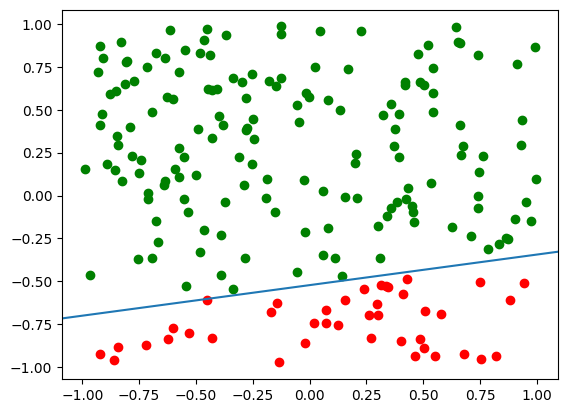

In [ ]:
res = useTargetFunction(200)

# Percpetron Learning Algorithm (PLA)